In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [9]:
with open('/home/atlas/Atlas/Bishwa/data/data.json', 'r') as f:
  data = json.load(f)

In [10]:
df = pd.DataFrame(eval(data))
df.head()

,image,label
0,Conus_saharicus_1_B.jpg,Conus saharicus
1,Schizoplax_brandtii_4_A.jpg,Schizoplax brandtii
2,Babynonia_areolata_13_B.jpg,Babynonia areolata
3,Heleobia_australis_3_B.jpg,Heleobia australis
4,Arthritica_helmsi_1_B.jpg,Arthritica helmsi


[]

/home/atlas/miniconda3/envs/atlas2/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/atlas/miniconda3/envs/atlas2/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/atlas/miniconda3/envs/atlas2/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 65288 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/atlas/miniconda3/envs/atlas2/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12288 missing from current font.
  font.set_text(s, 0, flags=flags)


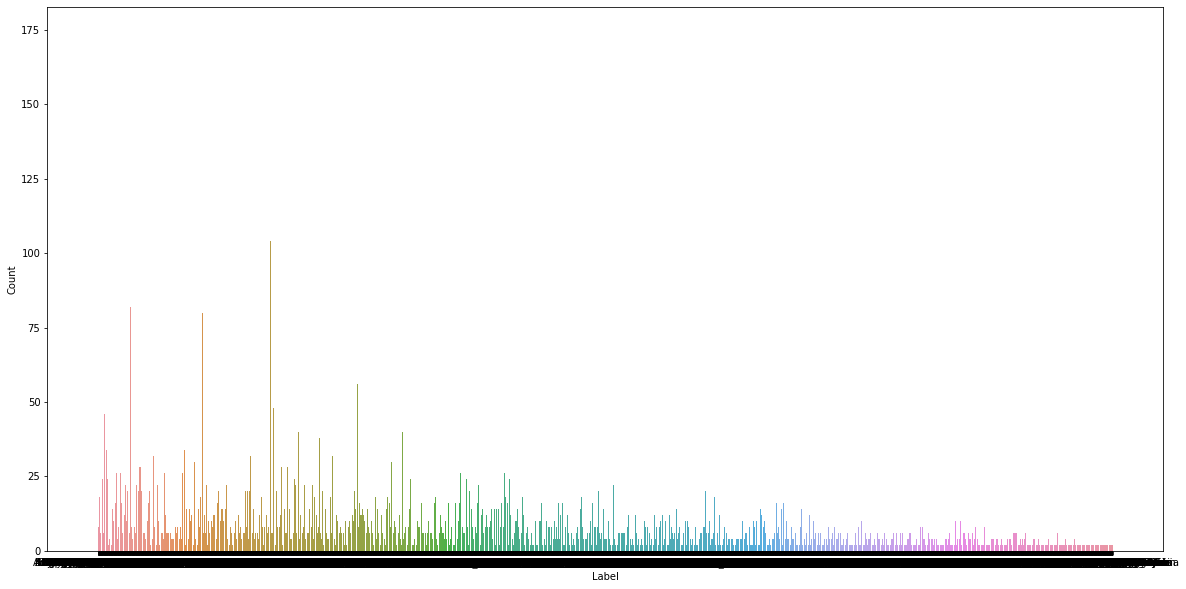

In [11]:
fig, ax = plt.subplots(figsize=(20,10))
p = sns.countplot('label', data=df, ax=ax)
p.set_xlabel('Label')
p.set_ylabel('Count')
plt.plot()

In [12]:
count = df['label'].value_counts()

In [13]:
grp_count = df.groupby('label').size()

In [14]:
grp_count.head()

label
Aandara consociata    20
Abida polyodon         6
Abida secale          28
Abra alba              4
Abra longicallus       4
dtype: int64

In [15]:
grp_count = grp_count.reset_index()
grp_count.head()

,label,0
0,Aandara consociata,20
1,Abida polyodon,6
2,Abida secale,28
3,Abra alba,4
4,Abra longicallus,4


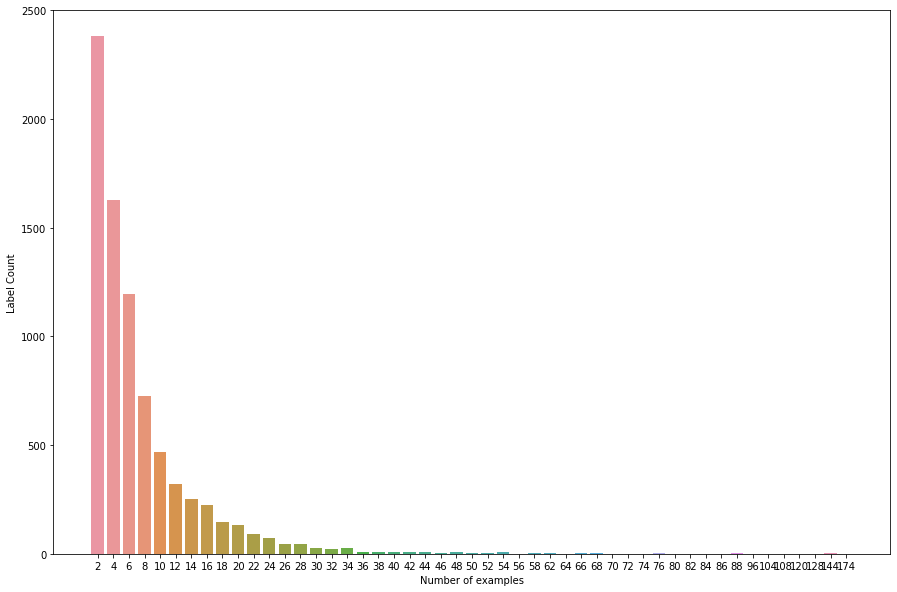

In [16]:
fig, ax = plt.subplots(figsize=(15,10))
p = sns.countplot(0, data=grp_count, ax=ax)
p.set_xlabel('Number of examples')
p.set_ylabel('Label Count')
plt.plot();

- so there are more labels having less number of examples

# Features with more than 40 data

In [17]:
grp_filter = grp_count[grp_count[0]>40]
grp_filter.head(4)

,label,0
149,Albinaria corrugata,66
150,Albinaria cretensis,42
312,Amphidromus basilanensis,72
318,Amphidromus contrarius,76


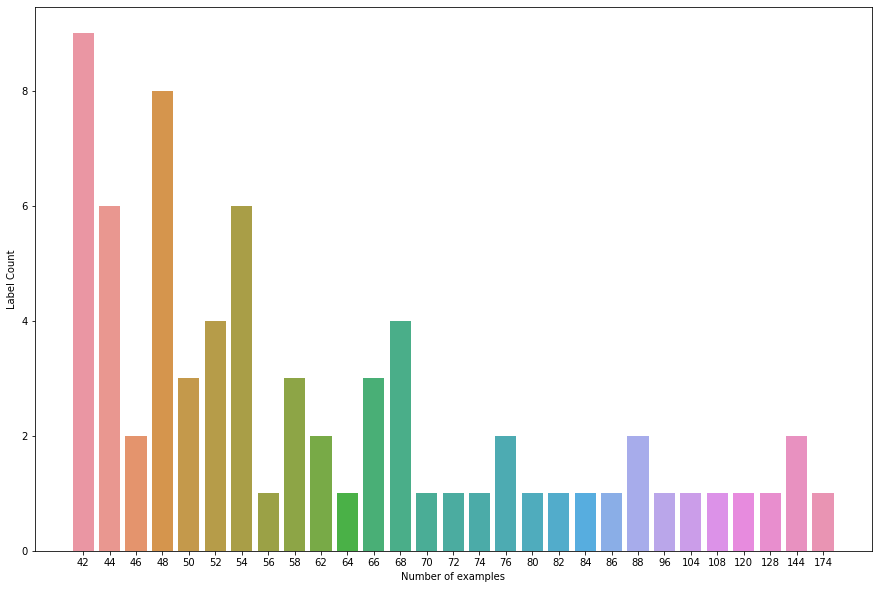

In [18]:
fig, ax = plt.subplots(figsize=(15,10))
p = sns.countplot(0, data=grp_filter, ax=ax)
p.set_xlabel('Number of examples')
p.set_ylabel('Label Count')
plt.plot();

In [19]:
grp_filter.shape[0]

71

In [20]:
lst = list(set(grp_filter['label']))

In [23]:
df_filter = df[df['label'].isin(lst)]
df_filter.head(4)

,image,label
7,Sinanodonta_woodiana_16_A.jpg,Sinanodonta woodiana
13,Uniandra_contradens_26_B.jpg,Uniandra contradens
14,Erronea_caurica_3_A.jpg,Erronea caurica
41,Amphidromus_poecilochrous_3_A.jpg,Amphidromus poecilochrous


In [24]:
df_filter.shape[0]

4582

In [25]:
df_filter.to_csv('/home/atlas/Atlas/Bishwa/data/data_greater_than_40.csv', index = False, header=True)